# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


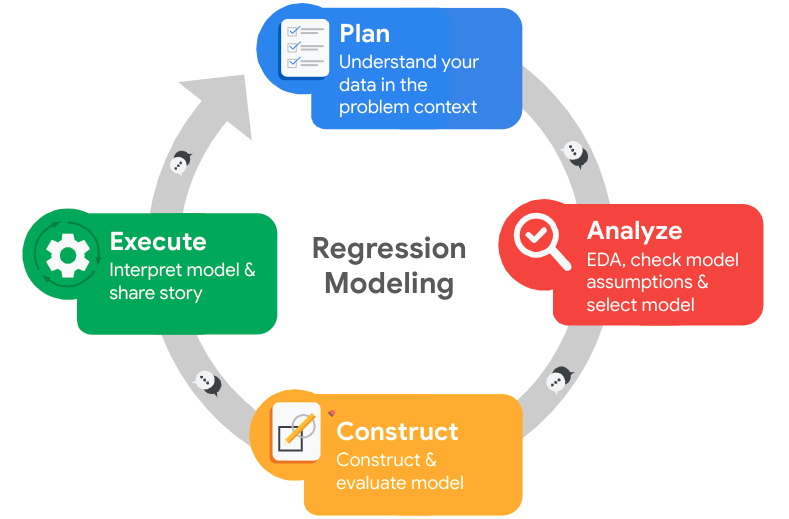

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sklearn metrics and functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving model
import pickle

# Display all columns in dataframes
pd.set_option('display.max_columns', None)

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display the first 10 rows to get an initial overview of the data.
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns to snake_case
df0.columns = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_monthly_hours', 'tenure', 'work_accident', 'left',
    'promotion_last_5years', 'department', 'salary'
]

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The output above displays the first five rows in the dataset that appear as duplicates elsewhere in the DataFrame.

A key question arises:

> **How plausible is it that these are legitimate, independent responses?**

Given that these entries are identical across all columns, including several continuous variables, it is highly improbable that two distinct employees would self-report the exact same values across 10+ variables.

While one could theoretically apply a likelihood analysis, this level of analysis is likely unnecessary in this case.

**Conclusion:**

Due to the extremely low likelihood of legitimate duplication, I will proceed by removing these duplicate rows from the dataset.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

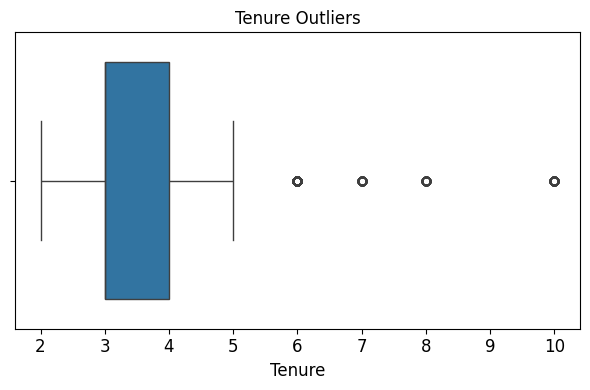

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 4))

sns.boxplot(data=df1, x='tenure')

plt.title('Tenure Outliers', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
# Determine the number of rows containing outliers

# 25th percentile value
q1 = df1['tenure'].quantile(0.25)

# 75th percentile value
q3 = df1['tenure'].quantile(0.75)

# interquartile range
iqr = q3 - q1

# upper limit and lower limit
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# subset of data containing outliers
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)
print("Number of rows containing outliers in tenure:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in tenure: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

To begin the analysis, I could create a **stacked box plot** of `average_monthly_hours` grouped by `number_project`, comparing the distributions between employees who **stayed** and those who **left**.

Box plots are a powerful tool for summarizing the distribution, spread, and central tendency of numerical data. However, they can be misleading without context, particularly regarding the sample sizes behind each box.

To complement this, I could also generate a **stacked histogram** to visualize the distribution of `number_project` for both groups: those who **stayed** and those who **left** the organization.

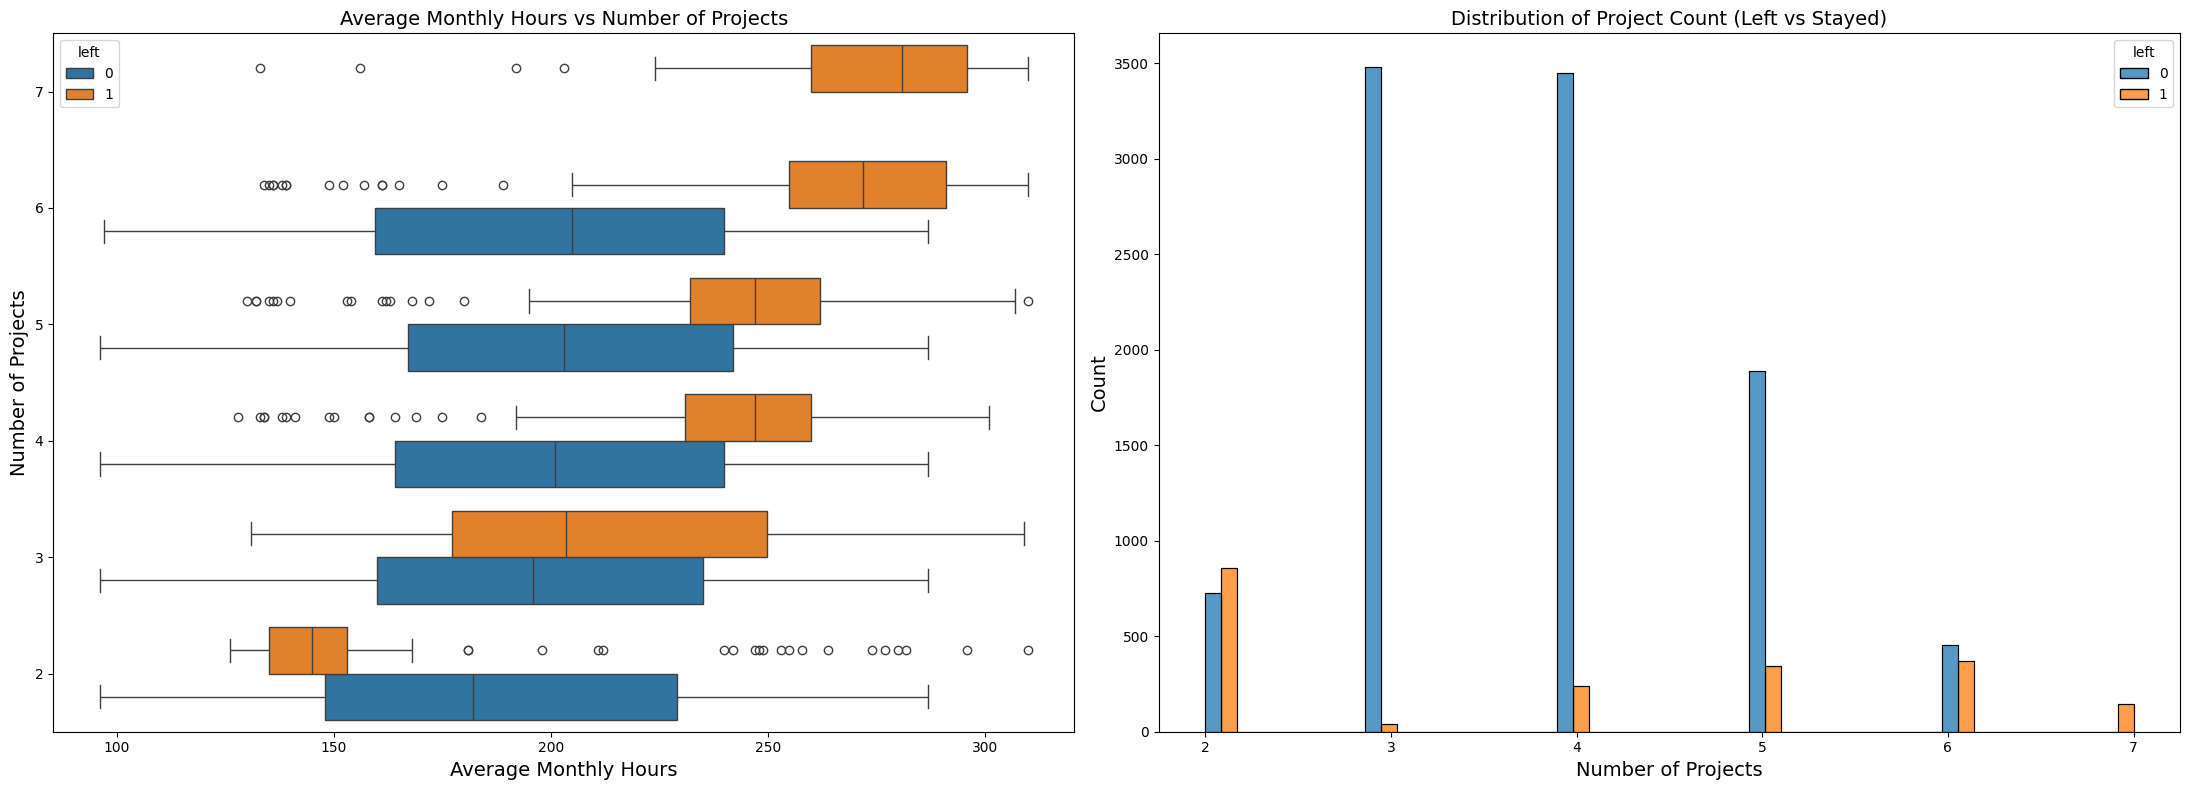

In [14]:
# Label map
label_map = {0: 'Stayed', 1: 'Left'}

# Setup subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Plot 1: Boxplot
sns.boxplot(data=df1,
            x='average_monthly_hours',
            y='number_project',
            hue='left',
            orient='h',
            ax=axes[0])

axes[0].invert_yaxis()

axes[0].set_title('Average Monthly Hours vs Number of Projects', fontsize='14')
axes[0].set_xlabel('Average Monthly Hours', fontsize='14')
axes[0].set_ylabel('Number of Projects', fontsize='14')

# Plot 2: Histogram
sns.histplot(data=df1,
             x='number_project',
             hue='left',
             multiple='dodge',
             ax=axes[1])

axes[1].set_title('Distribution of Project Count (Left vs Stayed)', fontsize='14')
axes[1].set_xlabel('Number of Projects', fontsize='14')
axes[1].set_ylabel('Count', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

### Workload, Project Count, and Attrition Insights

It’s intuitive to expect that employees who work on more projects would also log more hours, and this pattern holds true in the dataset. The mean average_monthly_hours increases with the number of projects, for both employees who stayed and those who left.

However, the visualization reveals some notable patterns:

- Two distinct groups emerge among those who left:

    - **Group A**: Employees who worked significantly fewer hours than their peers at the same project count.  
        - These individuals may have been fired, or perhaps had already given notice, resulting in reduced responsibilities.

    - **Group B**: Employees who worked substantially more hours than their peers.  
        - It is reasonable to infer that this group likely quit due to burnout. These employees may have been high contributors or core team members on their projects.

- Every employee who worked on 7 projects ended up leaving the company.
    - Their interquartile range of monthly hours was approximately 255–295 hours, which is substantially higher than any other group.

- The **optimal workload** appears to be around 3–4 projects.  
    - These cohorts have the lowest attrition rates, indicating a more sustainable balance between project load and work hours.

Assuming a standard work schedule:

- **40 hours/week**
- **2 weeks of vacation/year**

The expected average working hours per month is:

In [15]:
# Caculate average number of hours worked per month
hour_per_month = 50 * 40 / 12   # Assuming 2 week off per year with a 40 hours work week

print(f"{round(hour_per_month, 2)} hours per month")

166.67 hours per month


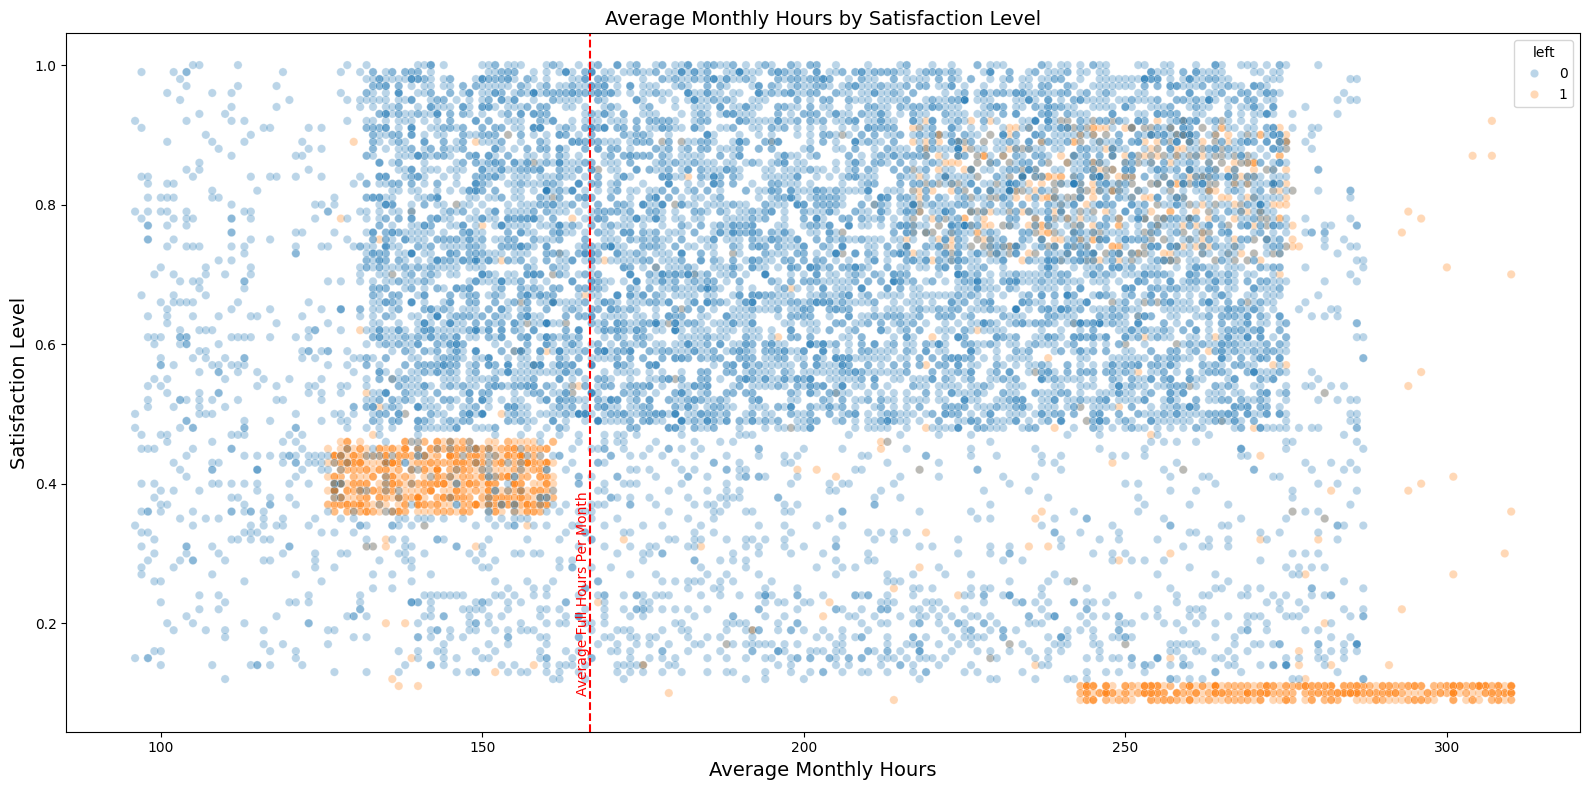

In [16]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='satisfaction_level',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.1, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Satisfaction Level', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Satisfaction Level', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

### Analysis of Work Hours and Satisfaction Levels

The scatterplot above reveals a sizeable group of employees working approximately 240–315 hours per month.  
To put this in perspective, 315 hours per month equates to over 75 hours per week sustained for a full year.  
It is likely that such extreme workload contributes to their very low satisfaction levels, which are close to zero.

The plot also highlights another group of employees who left the company but maintained more typical working hours.  
Despite this, their satisfaction levels hovered around 0.4, which is still relatively low.  
While it's difficult to pinpoint the exact reasons for their departure, one possible explanation is that they felt pressure to work longer hours, given many peers worked more.  
This perceived pressure may have contributed to their reduced satisfaction.

Finally, there exists a group working roughly 210–280 hours per month with satisfaction levels ranging from about 0.7 to 0.9.

> **Note:**  
> The unusual shape of the distribution in this scatterplot may indicate **data manipulation** or the presence of **synthetic data**.


For the next step in the analysis, it could be valuable to visualize **satisfaction levels by tenure** to explore how employee experience relates to satisfaction.

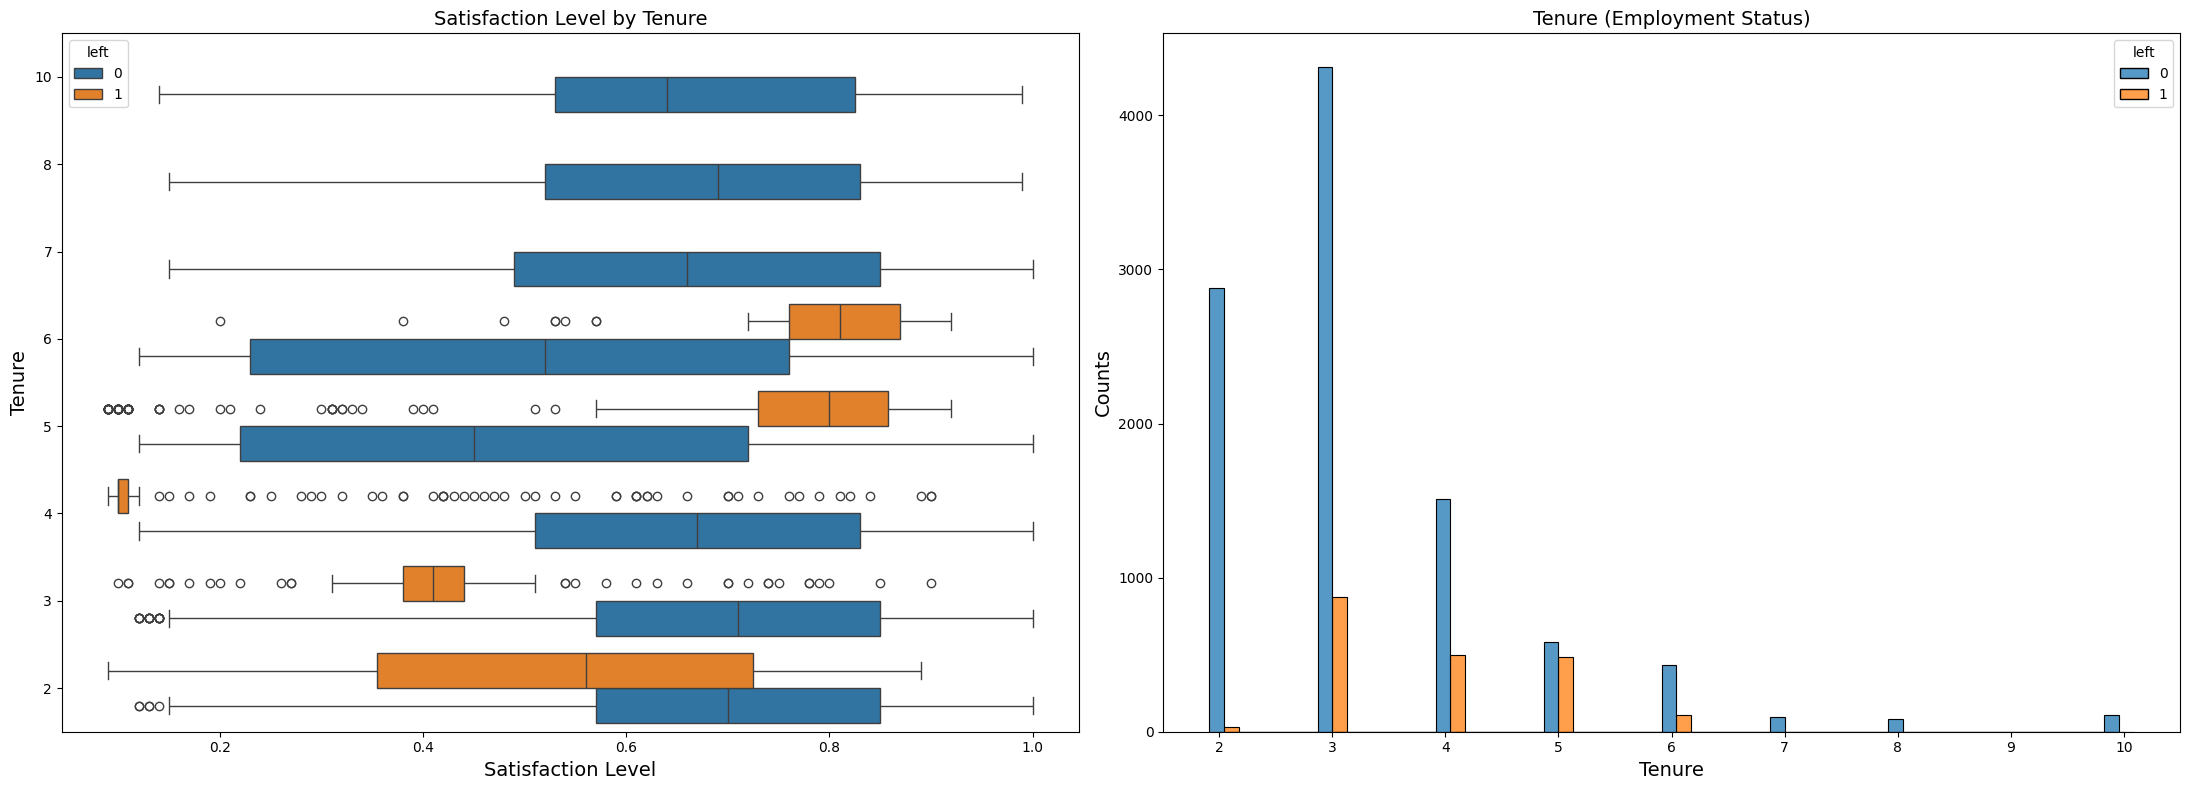

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df1,
            x='satisfaction_level',
            y='tenure',
            hue='left',
            orient='h',
            ax=axes[0])

axes[0].invert_yaxis()

axes[0].set_title('Satisfaction Level by Tenure', fontsize='14')
axes[0].set_xlabel('Satisfaction Level', fontsize='14')
axes[0].set_ylabel('Tenure', fontsize='14')

sns.histplot(data=df1,
             x='tenure',
             hue='left',
             multiple='dodge',
             shrink=3,
             ax=axes[1])

axes[1].set_title('Tenure (Employment Status)', fontsize='14')
axes[1].set_xlabel('Tenure', fontsize='14')
axes[1].set_ylabel('Counts', fontsize='14')

plt.tight_layout()
plt.show()

### Tenure and Employee Satisfaction Insights

From this plot, several observations emerge:

- Employees who left can be broadly grouped into two categories:  
  1. Dissatisfied employees with shorter tenures  
  2. Very satisfied employees with medium-length tenures

- Notably, employees with four years of tenure who left exhibit an unusually low satisfaction level. This anomaly suggests it may be valuable to investigate any company policies or events that specifically impacted employees around the four-year mark.

- The longest-tenured employees did not leave the company, and their satisfaction levels are comparable to those of newer employees who stayed.

- The histogram indicates that there are relatively few long-tenured employees.

### Next Steps

To deepen this analysis, I plan to calculate and compare the mean and median satisfaction scores*between employees who left and those who remained.



In [18]:
# Calculate mean and median satisfaction scores
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

### Satisfaction Scores: Left vs. Stayed Employees

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed.

Interestingly, among employees who stayed, the mean satisfaction score is slightly below the median, indicating a left-skewed distribution of satisfaction levels within this group.



### Next Steps

The next analysis could focus on examining salary levels across different tenures to explore potential correlations with employee retention and satisfaction.


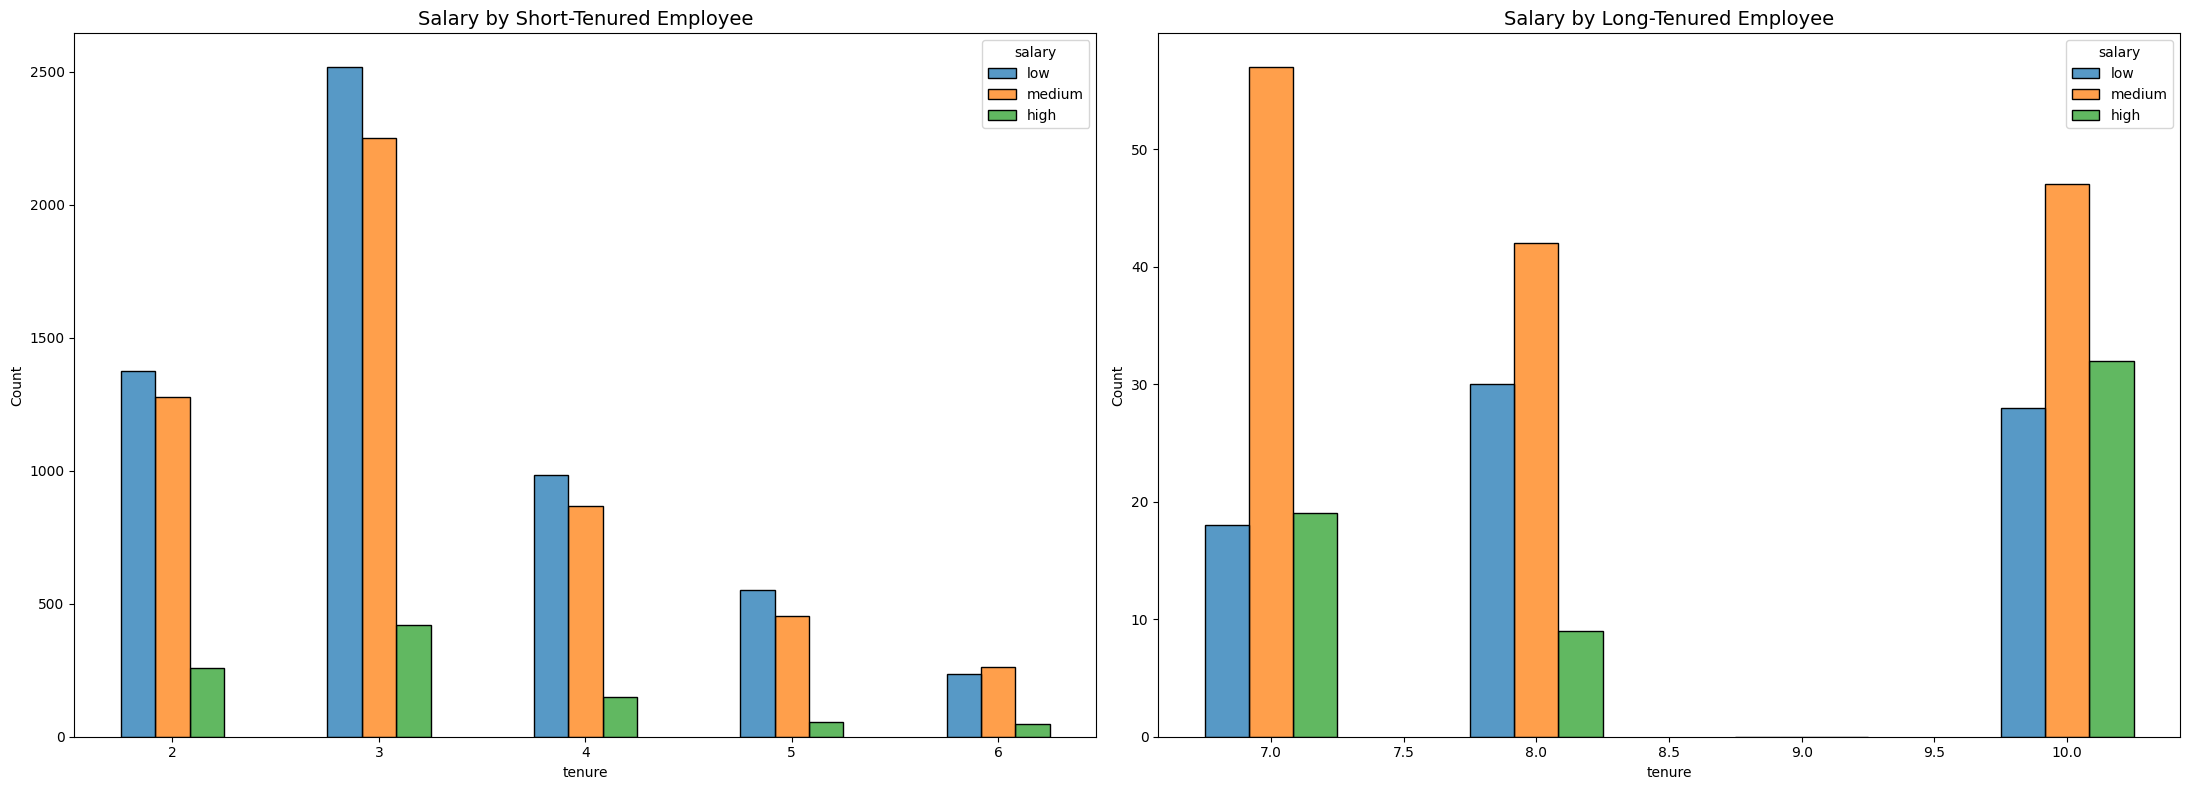

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]
hue_order=['low', 'medium', 'high']

sns.histplot(data=tenure_short,
            x='tenure',
            hue='salary',
            hue_order=hue_order,
            discrete=1,
            multiple='dodge',
            shrink=0.5,
            ax=axes[0])

axes[0].set_title('Salary by Short-Tenured Employee', fontsize='14')


sns.histplot(data=tenure_long,
             x='tenure',
             hue='salary',
             hue_order=hue_order,
             discrete=1,
             multiple='dodge',
             shrink=0.5,
             ax=axes[1])

axes[1].set_title('Salary by Long-Tenured Employee', fontsize='14')

plt.tight_layout()
plt.show()

### Analysis of Tenure and Salary

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.



### Next Steps

I could next explore whether there is a correlation between working long hours and receiving high evaluation scores.

To do this, I could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

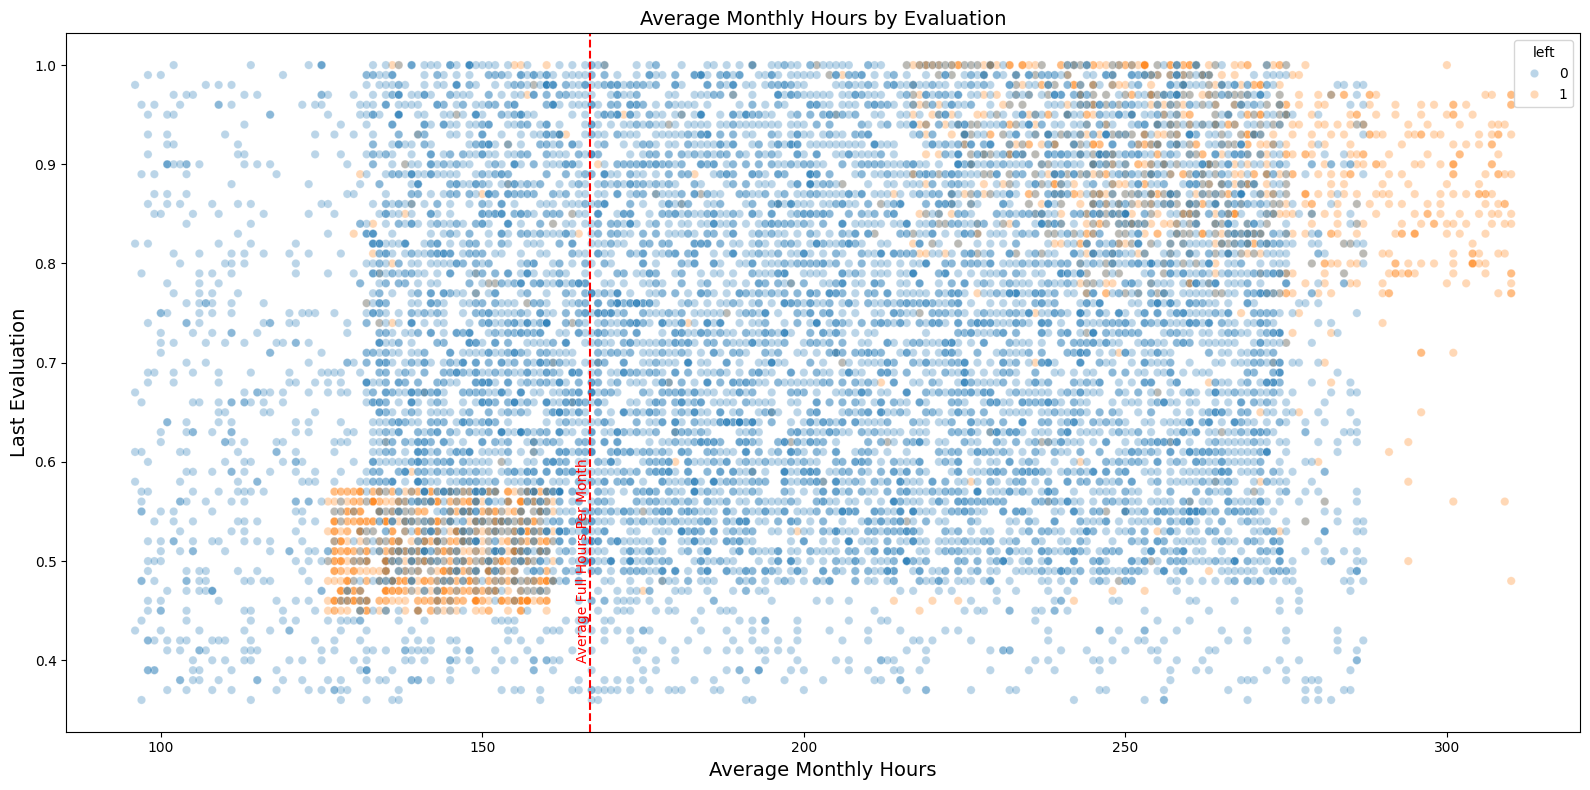

In [20]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='last_evaluation',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.4, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Evaluation', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Last Evaluation', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

### Observations from the Scatterplot

The scatterplot reveals several key insights:

- There appear to be two groups of employees who left:  
  1. Overworked employees with very high performance scores  
  2. Employees working slightly below the nominal monthly average of 166.67 hours with lower evaluation scores

- There seems to be a positive correlation between hours worked and evaluation score.

- Working long hours does not guarantee a high evaluation score.

- Most employees in this company work well over 167 hours per month.



### Next Steps

I could next investigate whether employees who worked very long hours were promoted in the last five years.

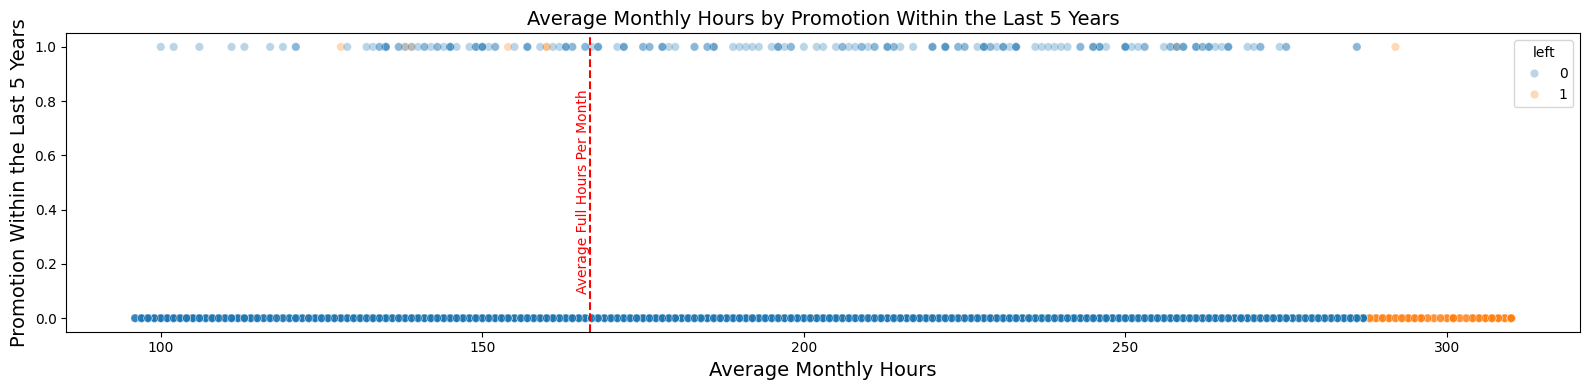

In [21]:
plt.figure(figsize=(16, 4))

sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='promotion_last_5years',
                hue='left',
                alpha=0.3)

plt.axvline(x=hour_per_month, color='r', ls='--')
plt.text(hour_per_month, 0.1, f'Average Full Hours Per Month', color='r', rotation=90, ha='right', va='baseline')

plt.title('Average Monthly Hours by Promotion Within the Last 5 Years', fontsize='14')
plt.xlabel('Average Monthly Hours', fontsize='14')
plt.ylabel('Promotion Within the Last 5 Years', fontsize='14')

# Show plot
plt.tight_layout()
plt.show()

### Insights from the Promotion and Work Hours Plot

The plot above shows:

- Very few employees who were promoted in the last five years ended up leaving.  
- Very few employees who worked the most hours were promoted.  
- Nearly all employees who left were working the longest hours.



### Next Steps

Next, I could analyze how employees who left are distributed across different departments.

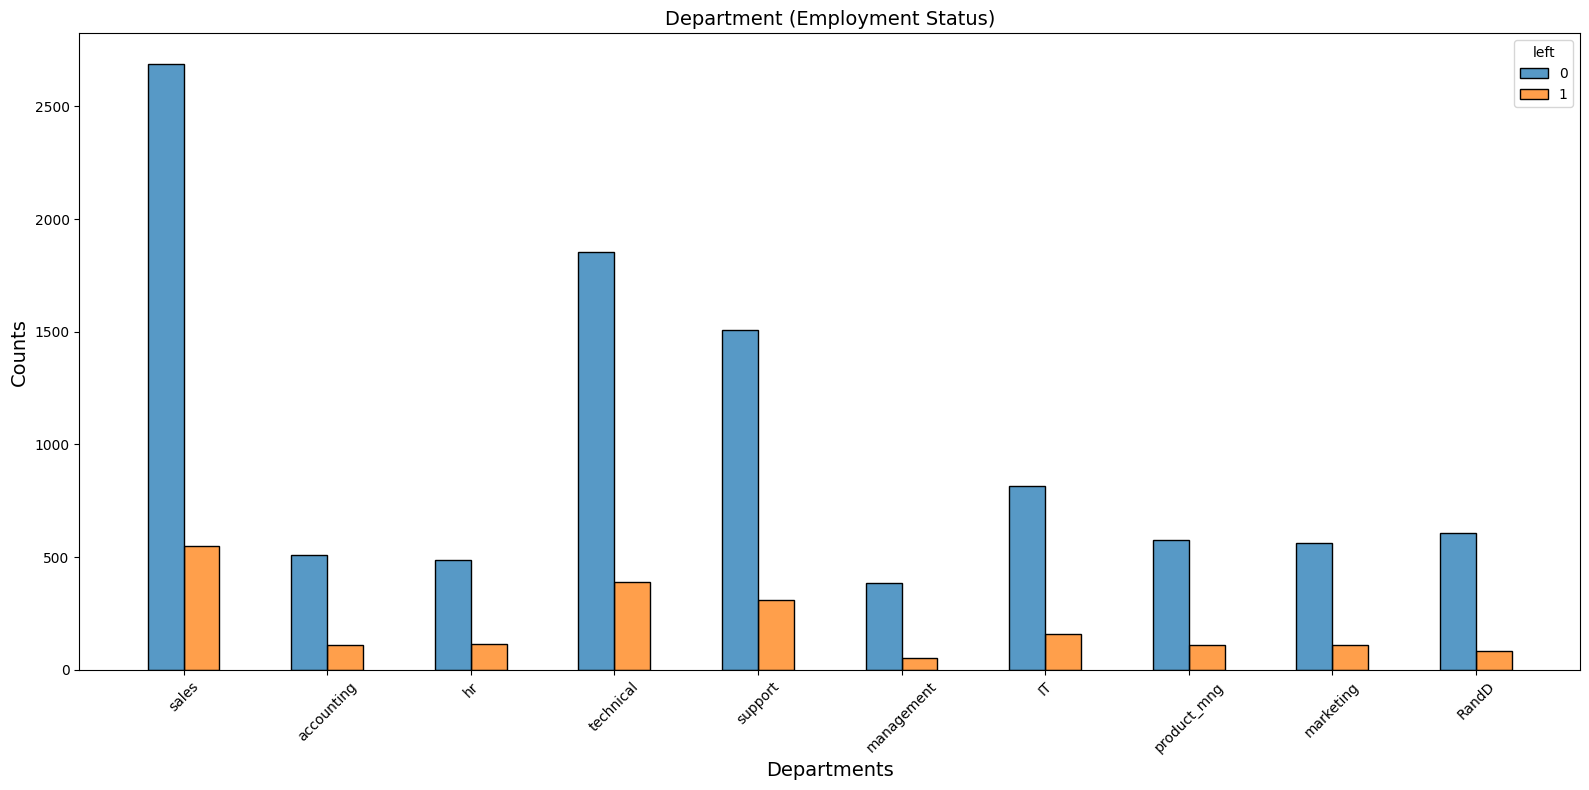

In [22]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df1,
             x='department',
             hue='left',
             discrete=1,
             shrink=0.5,
             multiple='dodge')

plt.title('Department (Employment Status)', fontsize='14')
plt.xlabel('Departments', fontsize='14')
plt.ylabel('Counts', fontsize='14')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Departmental Attrition Patterns

There doesn't appear to be any department that differs significantly in its proportion of employees who left compared to those who stayed.



### Next Steps

Lastly, I will check for correlations between variables in the dataset.

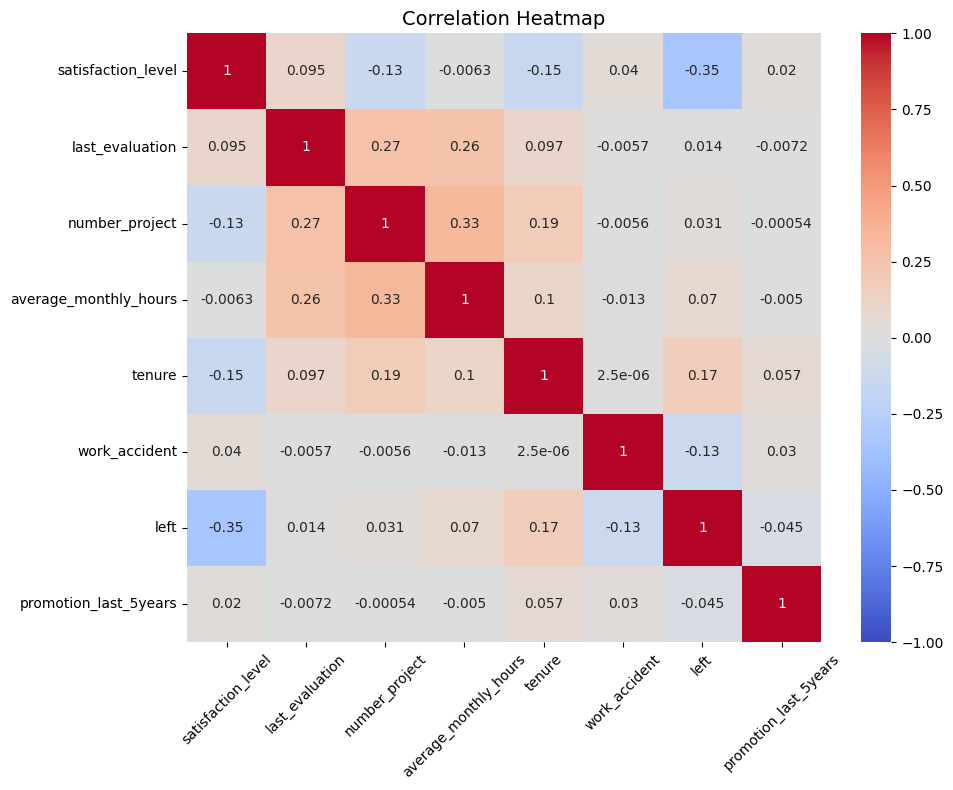

In [23]:
plt.figure(figsize=(10, 8))

correlation = df1.drop(['department', 'salary'], axis=1).corr()

sns.heatmap(correlation, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            cmap=sns.color_palette("coolwarm", as_cmap=True))

plt.title('Correlation Heatmap', fontdict={'fontsize':14})

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Correlation Analysis

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other.

Additionally, whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is associated with longer working hours, more projects, and lower satisfaction levels.

It may be ungratifying for employees to work long hours without receiving promotions or high evaluation scores. There seems to be a sizeable group of employees at the company who are likely experiencing burnout.

Additionally, employees who have been with the company for more than six years tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee will leave the company. This is captured by the outcome variable left, where a value of 1 indicates the employee left, and 0 indicates they stayed.

### Identify the types of models most appropriate for this task.

A Logistic Regression model or a Tree-based Machine Learning Model is suitable to predict a categorical variable, such as whether or not an employee wants to leave the company. 

## Logistic Regression Model

In [24]:
# Encode categorical variables
df_encoded = df1.copy()

# Convert the 'salary' column from object type to a numerical representation.
df_encoded['salary'] = df_encoded['salary'].astype('category').cat.codes

# Perform one-hot encoding on the 'department' column.
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

df_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       1   
1       6              0     1                      0       2   
2       4              0     1                      0       2   
3       5              0     1                      0       1   
4       3              0     1                      0       1   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

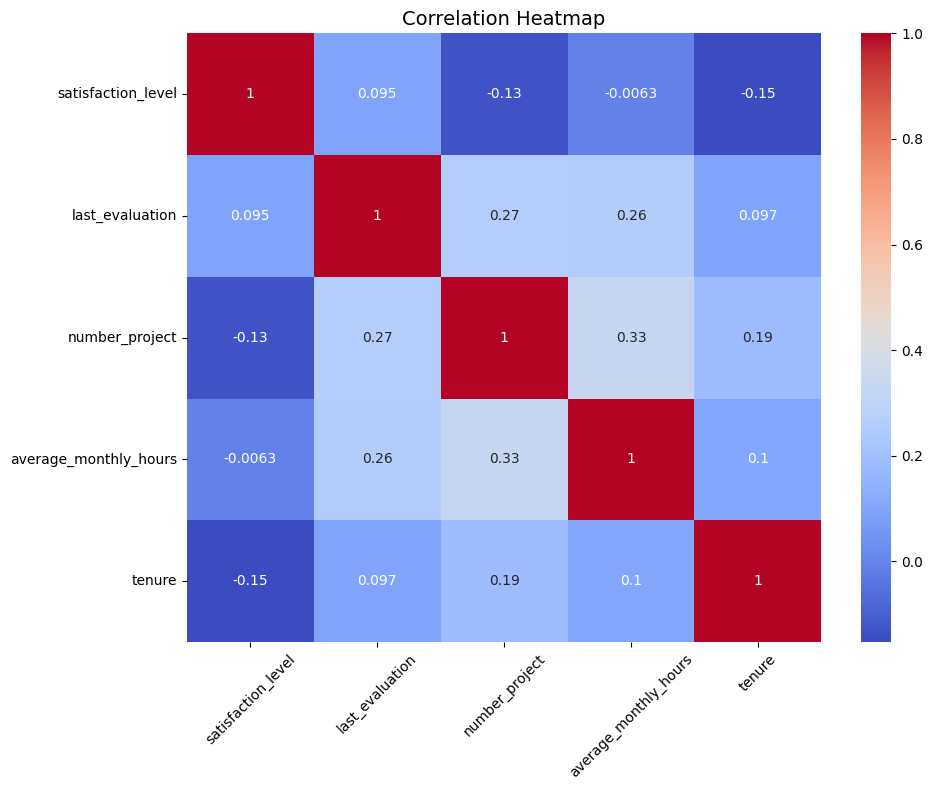

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
            annot=True, 
            cmap=sns.color_palette("coolwarm", as_cmap=True))

plt.title('Correlation Heatmap', fontdict={'fontsize':14})

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
# Remove outliers based on the 'tenure' column limits calculated earlier.
df_lr = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)].reset_index(drop=True)

df_lr.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.11             0.88               7                    272   
2                0.72             0.87               5                    223   
3                0.37             0.52               2                    159   
4                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  \
0       3              0     1                      0       1   
1       4              0     1                      0       2   
2       5              0     1                      0       1   
3       3              0     1                      0       1   
4       3              0     1                      0       1   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [27]:
# Prepare data for modeling.
y = df_lr['left']
X = df_lr.copy()
X = X.drop('left', axis=1)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [28]:
# Initialize and train the Logistic Regression model.
log_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

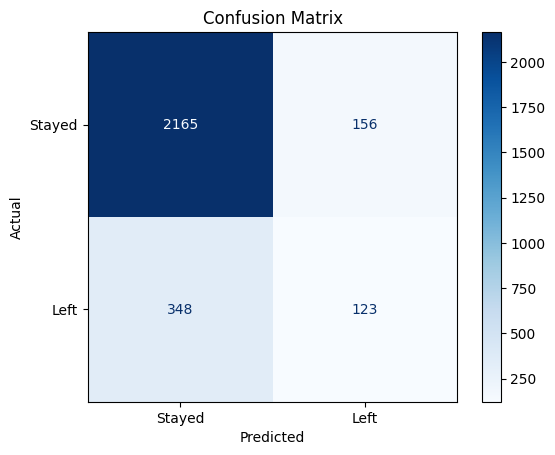

In [29]:
# Generate and display a confusion matrix to evaluate the model's predictions.
# Predict on the test data.
y_pred = log_clf.predict(X_test)

# Create the confusion matrix.
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Display the confusion matrix visually.
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=['Stayed', 'Left'])

log_disp.plot(cmap='Blues',
              values_format='')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

plt.show()

### Confusion Matrix Interpretation

The confusion matrix is structured as follows:
|                 | Predicted: Not Leave | Predicted: Leave     |
|-----------------|----------------------|-----------------------|
| **Actual: Not Leave** | True Negatives (TN)   | False Positives (FP)  |
| **Actual: Leave**     | False Negatives (FN)  | True Positives (TP)   |

Quadrant Descriptions:

Upper-left **True Negatives (TN)**: The number of people who **did not leave** that the model **accurately predicted did not leave**.

Upper-right **False Positives (FP)**: The number of people who **did not leave** that the model **inaccurately predicted as leaving**.

Bottom-left **False Negatives (FN)**: The number of people who **left** that the model **inaccurately predicted did not leave**.

Bottom-right**True Positives (TP)**: The number of people who **left** that the model **accurately predicted as leaving**.

**Ideal Scenario:**  
A perfect model would yield **only true negatives and true positives**, with **no false negatives or false positives**.

In [30]:
df_lr['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

### Class Balance

There is an approximately **83%-17% split** between the two classes. While the data is not perfectly balanced, it is also not too severely imbalanced. If the imbalance were more extreme, it might be necessary to resample the data to achieve better class balance. In this case, however, the current distribution is acceptable, and I will proceed with model evaluation without modifying the class balance.


In [31]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



### Model Performance Summary

The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and an accuracy of 82%.

However, if the primary goal is to predict employees who leave, then the performance scores for that class are significantly lower.

## Tree-based Model

In [32]:
# Prepare data for modeling.
y = df_encoded['left']
X = df_encoded.copy()
X = X.drop('left', axis=1)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [33]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[None, 2, 4, 8, 10, 15, 20, 25, 30, 50],
             'min_samples_leaf': [1, 3, 5, 7, 10],
             'min_samples_split': [2, 4, 6, 8, 10]
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

dt_grid = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [34]:
%%time
dt_grid.fit(X_train, y_train)

CPU times: total: 24.2 s
Wall time: 24.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 8, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [35]:
dt_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [36]:
dt_grid.best_score_

np.float64(0.9698344969964589)

This is a strong AUC score, indicating that the model is effective at distinguishing between employees who will leave and those who will stay.

In [37]:
def make_results(model_name, model_object, metric:str):
    """
    Returns a DataFrame with key performance metrics for the best model 
    from a cross-validation search.

    Parameters:
    - model_name: str, name of the model
    - model_object: fitted GridSearchCV or similar object
    - metric: str, metric to select the best model ('auc', 'precision', 'recall', 'f1', 'accuracy')

    Returns:
    - DataFrame with model name and scores for precision, recall, F1, accuracy, and AUC
    """
    
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                   }
    
    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [38]:
dt_cv_results = make_results('decision tree cv', dt_grid, 'auc')
dt_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915522  0.913602  0.914495  0.971645  0.969834

### Model Performance and Next Steps

All of these scores from the decision tree model indicate strong model performance.

Recall that decision trees can be vulnerable to overfitting, while random forests mitigate this risk by combining multiple trees for predictions.

As a next step, I will construct a random forest model.

### Random Forest

In [39]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [2, 3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [100, 200, 300, 500],
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 28min 17s
Wall time: 28min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [51]:
path = ''

In [48]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [49]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [52]:
write_pickle(path, rf_cv, 'rf_cv_1')

In [53]:
rf_cv_1 = read_pickle(path, 'rf_cv_1')

In [54]:
rf_cv_1.best_score_

np.float64(0.980064760839749)

In [55]:
rf_cv_1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [56]:
rf_cv_1_results = make_results('random forest cv', rf_cv_1, 'auc')

print(dt_cv_results)
print(rf_cv_1_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915522  0.913602  0.914495  0.971645  0.969834
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.948574  0.912933  0.930387  0.977316  0.980065


The random forest model demonstrates superior evaluation scores compared to the decision tree model across all metrics. This suggests that the random forest model generally outperforms the decision tree model.

The next step is to evaluate the final model using the test dataset.

To streamline this process, I will define a function that computes all relevant evaluation scores based on a model’s predictions.

In [57]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    """
    Compute key classification metrics for a model's predictions on test data.

    Parameters:
    - model_name : str, Name of the model.
    - model : estimator, Fitted model with a 'best_estimator_' attribute.
    - X_test_data : array-like, Test features.
    - y_test_data : array-like, True test labels.

    Returns:
    - DataFrame with model name and metrics: precision, recall, f1, accuracy, and AUC.
    """
        
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [58]:
rf_cv_1_test_scores = get_scores('random forest 1 test', rf_cv_1, X_test, y_test)
rf_cv_1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest 1 test   0.966173  0.917671  0.941298  0.980987  0.955635

The test scores closely match the validation scores, indicating consistent model performance. This suggests the model is robust. Since the test set was reserved solely for this final evaluation, the model’s performance reflects how it will generalize to new, unseen data.

### Feature Engineering

The unusually high evaluation scores raise concerns about possible data leakage. Data leakage occurs when information is used to train the model that should not be available during training, either because it appears in the test set or because such data would not be accessible in a real deployment scenario. This can lead to overly optimistic performance metrics that fail to generalize in production.

In this context, it is unlikely that the company will have satisfaction levels reported for all employees. Additionally, the `average_monthly_hours` feature may also contribute to data leakage. Employees who have decided to quit or who have been flagged for termination might be working fewer hours, thus revealing information that would not normally be known ahead of time.

The initial decision tree and random forest models used all available variables as features. The next phase will involve feature engineering to develop improved models.

This includes dropping the `satisfaction_level` variable and creating a new binary feature, `overworked`, to indicate whether an employee is working excessive hours.

In [59]:
df2 = df_encoded.drop('satisfaction_level', axis=1)

df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_RandD  \
0              0     1                      0       1             False   
1              0     1                      0       2             False   
2              0     1                      0       2             False   
3              0     1                      0       1             False   
4              0     1                      0       1             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

In [60]:
df2['overworked'] = df2['average_monthly_hours']

print('Most hours worked:', df2['overworked'].max())
print('Least hours worked:', df2['overworked'].min())

Most hours worked: 310
Least hours worked: 96


166.67 represents the approximate average monthly hours for an individual working 50 weeks per year, 5 days per week, 8 hours per day.

Employees working more than 175 hours per month on average will be defined as overworked.

In [61]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)

In [62]:
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_RandD  department_accounting  \
0                      0       1             False                  False   
1                      0       2             False                  False   
2                      0       2             False                  False   
3                      0       1             False                  False   
4                      0       1             False                  False   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  overworked  
0                 False           0  
1                 False           1  
2                 False           1  
3                 False           1  
4                 False           0

In [63]:
y = df2['left']
X = df2.copy()
X = X.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree - Round 2

In [64]:
decision_tree_2 = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[None, 2, 4, 8, 10, 15, 20, 25, 30, 50],
             'min_samples_leaf': [1, 3, 5, 7, 10],
             'min_samples_split': [2, 4, 6, 8, 10]
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

dt2_cv = GridSearchCV(decision_tree_2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [65]:
%%time
dt2_cv.fit(X_train, y_train)

CPU times: total: 18.9 s
Wall time: 19.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 8, 10, 15, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [66]:
dt2_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [67]:
dt2_cv.best_score_

np.float64(0.9561739697877688)

This model achieves strong performance despite excluding satisfaction levels and detailed work hour data.

In [68]:
dt2_cv_results = make_results('decision tree 2 cv', dt2_cv, 'auc')
print(dt_cv_results)
print(dt2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915522  0.913602  0.914495  0.971645  0.969834
                model  precision   recall        F1  accuracy       auc
0  decision tree 2 cv   0.888884  0.88881  0.888662  0.963083  0.956174


Some of the scores fell. It is expected given that there are fewer features used in this perticular model. Still, it achived a strong performance.

### Random Forest - Round 2

In [69]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'max_depth': [2, 3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [100, 200, 300, 500],
             }

scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

rf2_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [70]:
%%time
rf2_cv.fit(X_train, y_train)

CPU times: total: 20min 33s
Wall time: 20min 37s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [71]:
write_pickle(path, rf2_cv, 'hr_rf2')

In [72]:
rf2_cv = read_pickle(path, 'hr_rf2')

In [73]:
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [74]:
rf2_cv.best_score_

np.float64(0.9652091114583781)

In [75]:
rf2_cv_results = make_results('random forest 2 cv', rf2_cv, 'auc')
print(dt2_cv_results)
print(rf2_cv_results)

                model  precision   recall        F1  accuracy       auc
0  decision tree 2 cv   0.888884  0.88881  0.888662  0.963083  0.956174
                model  precision    recall        F1  accuracy       auc
0  random forest 2 cv     0.8652  0.875401  0.870017  0.956633  0.965209


In [76]:
rf2_test_scores = get_scores('random forest 2 test', rf2_cv, X_test, y_test)
rf2_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest 2 test   0.869732  0.911647  0.890196  0.962642  0.942223

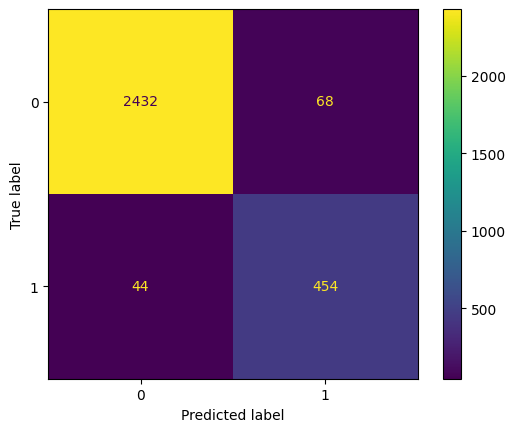

In [77]:
preds = rf2_cv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, preds, labels=rf2_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2_cv.classes_)

disp.plot(values_format='')

plt.show()

### Decision tree splits

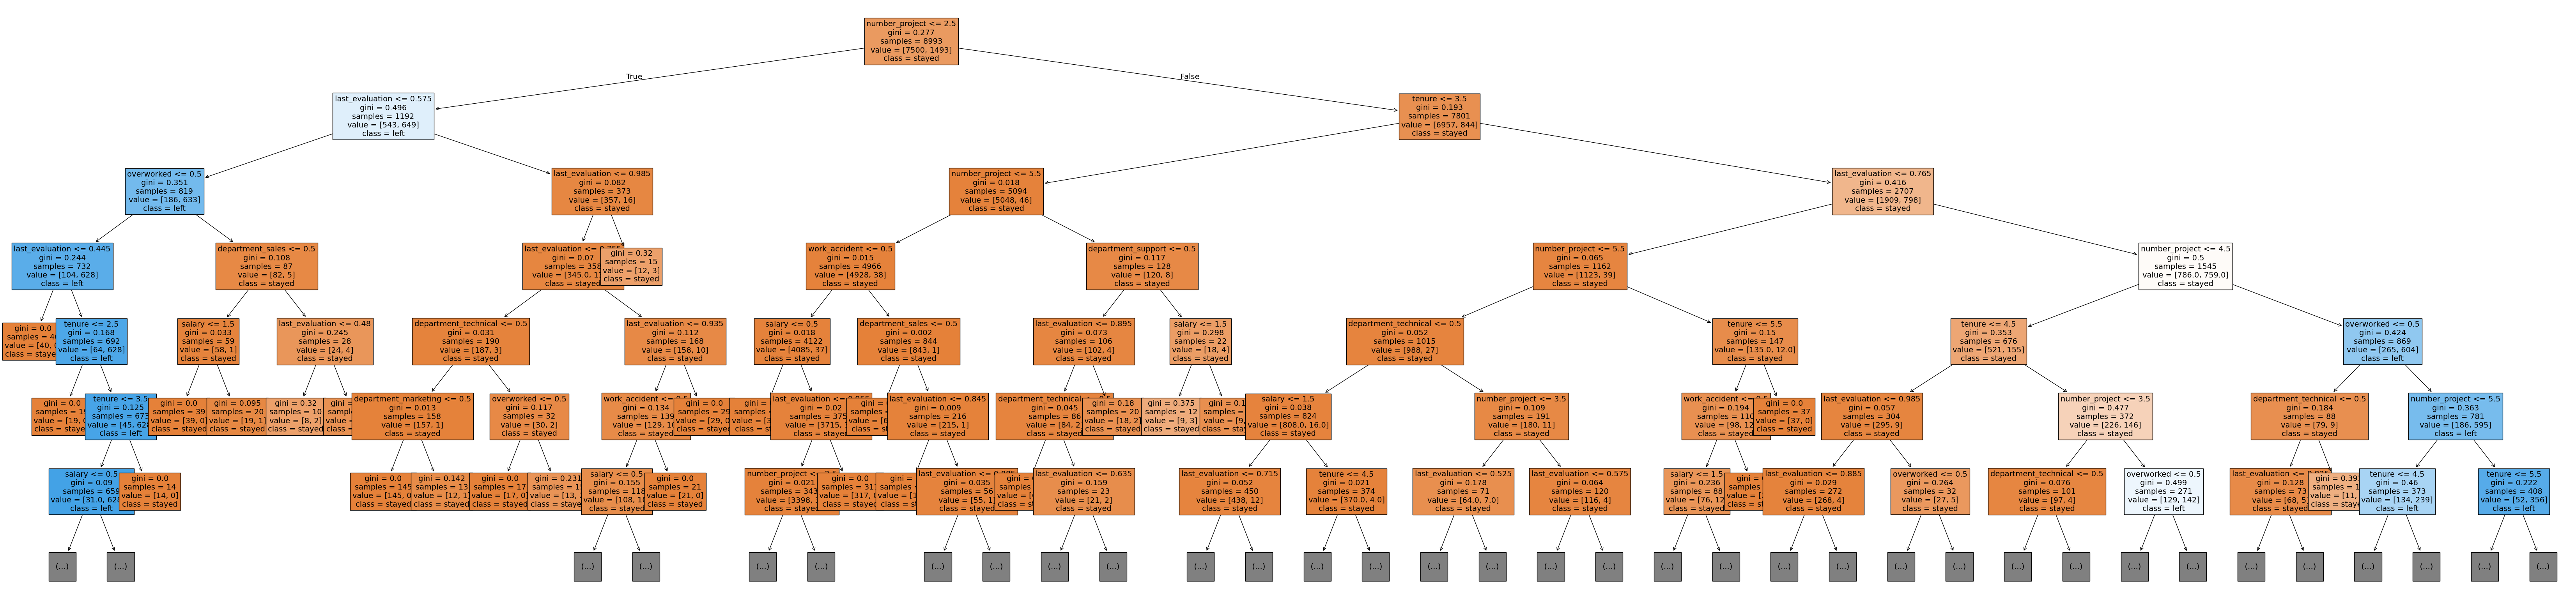

In [78]:
plt.figure(figsize=(85,20))

plot_tree(dt2_cv.best_estimator_, 
          max_depth=6, fontsize=14, 
          feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, 
          filled=True)

plt.show()

### Decision tree feature importance


In [79]:
dt2_importances = pd.DataFrame(dt2_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )

dt2_importances = dt2_importances.sort_values(by='gini_importance', ascending=False)

dt2_importances = dt2_importances[dt2_importances['gini_importance'] != 0]

dt2_importances

gini_importance
last_evaluation              0.326678
number_project               0.315834
tenure                       0.250680
overworked                   0.102663
department_technical         0.001175
salary                       0.001069
work_accident                0.000894
department_support           0.000511
department_sales             0.000424
department_marketing         0.000072

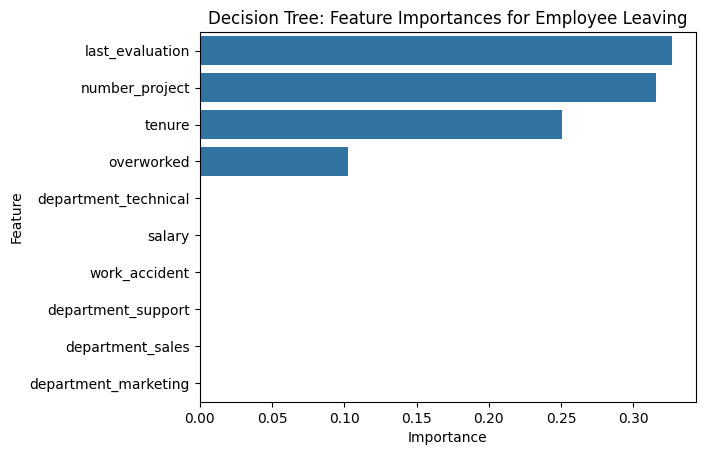

In [80]:
sns.barplot(data=dt2_importances, x="gini_importance", y=dt2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The bar plot above indicates that in the decision tree model, the features with the greatest importance are, in descending order: last_evaluation, number_project, tenure, and overworked. These variables contribute most significantly to predicting the target variable, left.

### Random forest feature importance


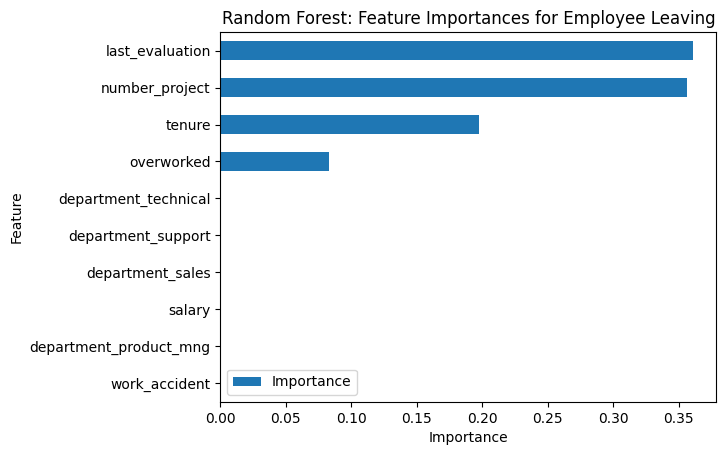

In [81]:
feat_impt = rf2_cv.best_estimator_.feature_importances_

ind = np.argpartition(rf2_cv.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in the random forest model, the most important features, also in descending order—are last_evaluation, number_project, tenure, and overworked. These match the key predictors identified in the decision tree model for predicting the target variable, left.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved a precision of 79%, recall of 82%, F1-score of 80% (all weighted averages), and accuracy of 82% on the test set.

**Tree-based Machine Learning**

Following feature engineering, the decision tree model achieved an AUC of 94.2%, precision of 87.0%, recall of 91.2%, F1-score of 89.0%, and accuracy of 96.3% on the test set. The random forest model modestly outperformed the decision tree.

### Conclusion, Recommendations, Next Steps

The models and feature importance analysis confirm that employees at the company are overworked.

Recommendations to Stakeholders:

- Limit the number of projects assigned to each employee.

- Investigate the dissatisfaction among employees with tenure of at least four years, and consider promotion opportunities for this group.

- Either incentivize employees for extended work hours or reduce the expectation of overtime.

- Ensure employees are aware of the company’s overtime pay policies, and clarify expectations around workload and time off.

- Facilitate company-wide and team-specific discussions to assess and improve workplace culture.

- Avoid reserving high evaluation scores solely for employees working 200+ hours per month; consider a proportional rewards system based on contribution and effort.

**Next Steps:**

Concerns about potential data leakage remain. It would be valuable to evaluate model performance after removing the `last_evaluation` feature, as evaluations may not be conducted frequently. Predicting employee retention without this feature could increase model robustness. Alternatively, if evaluation scores strongly influence employee turnover, exploring models that predict performance scores or satisfaction may provide additional insights.